In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [54]:
df = pd.read_csv("weight-height (1).csv")

In [55]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [56]:
df.isna().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [57]:
df.duplicated().sum()

np.int64(0)

In [58]:
df.shape

(8555, 3)

In [59]:
df.info

<bound method DataFrame.info of       Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
8550  Female  60.483946  110.565497
8551  Female  63.423372  129.921671
8552  Female  65.584057  155.942671
8553  Female  67.429971  151.678405
8554  Female  60.921791  131.253738

[8555 rows x 3 columns]>

In [60]:
df.describe()

,Height,Weight
count,8555.000000,8555.000000
mean,66.809925,165.632735
std,3.851454,32.043922
min,54.616858,65.780000
25%,63.957684,139.876803
50%,66.985923,168.521567
75%,69.604427,190.666305
max,80.450000,269.989698


<Axes: xlabel='Gender'>

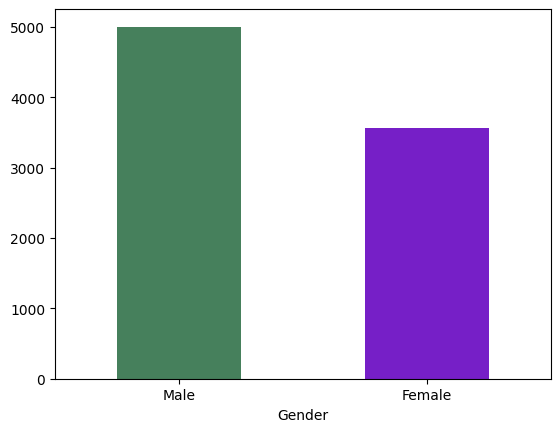

In [61]:
df["Gender"].value_counts().plot(kind="bar",color=["#46805c", "#761fc7"], rot=0)

In [62]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


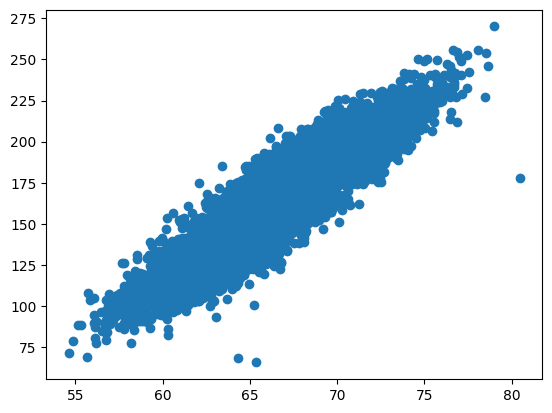

In [63]:
plt.scatter(x=df.Height,y=df.Weight)

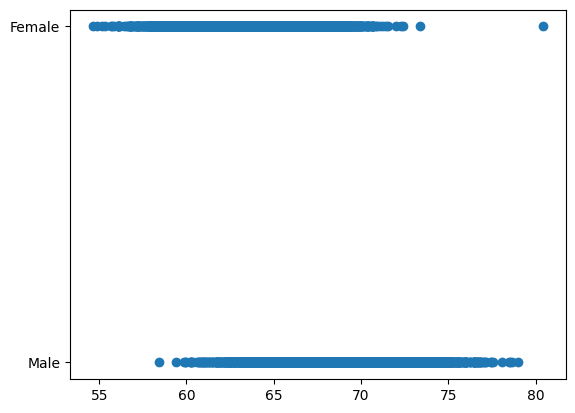

In [64]:
plt.scatter(x=df.Height, y=df.Gender)

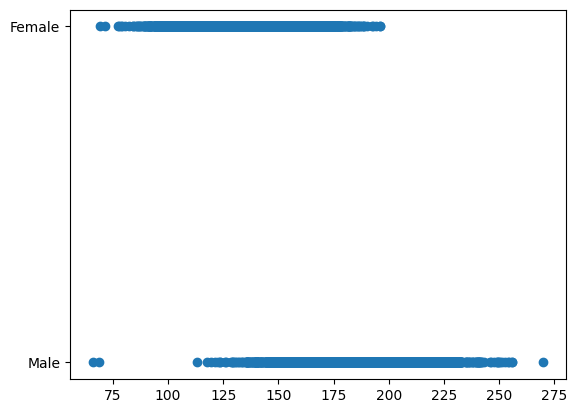

In [65]:
plt.scatter(x=df.Weight, y=df.Gender)

In [66]:
x = df[["Height"]]
y = df[["Gender"]]

In [67]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [68]:
y.head()

,Gender
0,Male
1,Male
2,Male
3,Male
4,Male


In [69]:
y = y.replace(["Male","Female"],[1,0])

C:\Users\h\AppData\Local\Temp\ipykernel_8196\2582843599.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = y.replace(["Male","Female"],[1,0])


In [70]:
y.head()

,Gender
0,1
1,1
2,1
3,1
4,1


In [71]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=.2, random_state=42)

In [72]:
xtrain.head()

,Height
6826,60.817590
624,71.711125
5518,63.674482
3946,70.466623
6993,61.528212


In [73]:
ytrain.head()

,Gender
6826,0
624,1
5518,0
3946,1
6993,0


In [74]:
lr = LinearRegression()

In [75]:
model = lr.fit(xtrain,ytrain)

In [76]:
model.score(xtrain,ytrain)

0.4594188156863007

In [77]:
model.score(xtest,ytest)

0.49140882000720854

In [78]:
pred_y = model.predict(xtest)
pred_y

array([[0.41598143],
       [0.76695921],
       [0.94741259],
       ...,
       [0.88929493],
       [0.87691656],
       [0.41376695]], shape=(1711, 1))

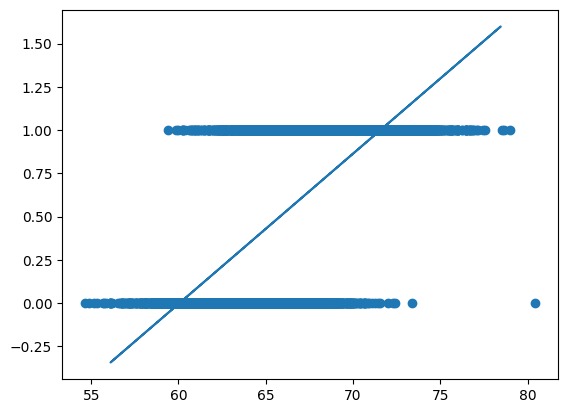

In [79]:
plt.scatter(xtrain,ytrain)
plt.plot(xtest,pred_y)

In [82]:
mae = mean_absolute_error(ytest,pred_y)
mae

0.29120793388808164

In [84]:
mse = mean_squared_error(ytest,pred_y)
mse

0.12326493983827454

In [85]:
r_score = r2_score(ytest,pred_y)
r_score

0.49140882000720854

In [86]:
los_reg = LogisticRegression()

In [87]:
model1 = los_reg.fit(xtrain,ytrain)

c:\Users\h\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
model1.score(xtrain,ytrain)

0.8299240210403273

In [89]:
model1.score(xtest,ytest)

0.8457042665108124

In [91]:
y_pred = model1.predict(xtest)
y_pred

array([0, 1, 1, ..., 1, 1, 0], shape=(1711,))

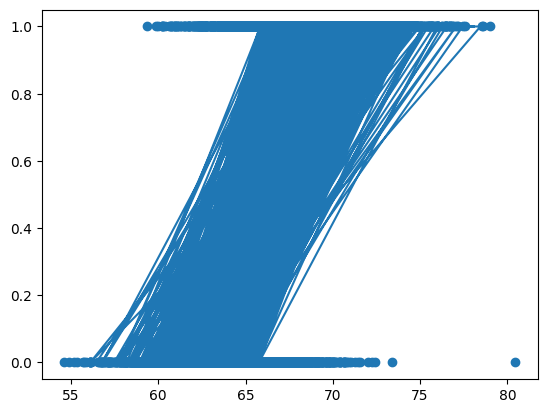

In [ ]:
plt.scatter(xtrain,ytrain)
plt.plot(xtest,y_pred)

In [100]:
mae = mean_absolute_error(ytest,y_pred)
mae

0.1542957334891876

In [101]:
mse = mean_squared_error(ytest,y_pred)
mse

0.1542957334891876

In [102]:
r_score = r2_score(ytest,y_pred)
r_score

0.36337575578199643

In [110]:
model1.predict_proba(xtest)

array([[0.65090414, 0.34909586],
       [0.11729508, 0.88270492],
       [0.03304391, 0.96695609],
       ...,
       [0.05026155, 0.94973845],
       [0.05489925, 0.94510075],
       [0.65468138, 0.34531862]], shape=(1711, 2))